# Open Exploration

The open exploration notebook is divided into several different sections:
1. Exploration of inaction
2. Selection of a worst-case scenario
3. Exploration of policies of interest

## 0. Model preparation
The required libraries and modeling tools for all sections can be imported through this cell.

In [1]:
#Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import copy

#Ema-workbench - organise per cell?
from ema_workbench import (Model, MultiprocessingEvaluator, ema_logging, Policy, Scenario)

from ema_workbench.util.utilities import save_results, merge_results, load_results

from ema_workbench.analysis import prim, pairs_plotting


from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties

ema_logging.log_to_stderr(ema_logging.INFO)

#Set up for the model
from problem_formulation import get_model_for_problem_formulation

C:\Users\twand\miniconda3\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## 1. Exploration of inaction
A reference policy of interest is when no action would be taken whatsoever. To this end a simple problem formulation will suffice, as it will already provide insight into the overall damages and deaths that inaction might cause. This inaction will be compared to 5 random combinations of policies. 

In [2]:
#Select the preferred problem formulation (0-5)

#dike_model, planning_steps = get_model_for_problem_formulation(0) #2-objective: All Costs & Expected Number of Deaths (END)
dike_model, planning_steps = get_model_for_problem_formulation(1) #3-objective: Expected Annual Damages (EAD), Total Investment Costs (TIC) & END
#dike_model, planning_steps = get_model_for_problem_formulation(2) #5-objective: EAD, Dike Investment Costs (DIC), RfR Total Costs (RTC), Evacuation Costs (EC) & END
#dike_model, planning_steps = get_model_for_problem_formulation(3) #Disagg location: Per Dike: EAD, DIC, Total Costs (TC) & END. Total: RTC & Expected Evacuation Costs (EEC)
#dike_model, planning_steps = get_model_for_problem_formulation(4) #Disagg over time: Per Dike: EAD, DIC & END. Total: RTC & EEC
#dike_model, planning_steps = get_model_for_problem_formulation(5) #Fully disagg: Per Dyke: EAD, DIC & END. Total: RTC & EEC

#Set the levers, uncertainties & outcomes
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)
outcomes = copy.deepcopy(dike_model.outcomes)

In [3]:
#Set up the no-action scenario by setting all scenarios to zero.
keys = [*[f"{i}_RfR {j}" for i in range(5) for j in range(3)], *[f"A.{i+1}_DikeIncrease {j}" for i in range(5) for j in range(3)]]
values = [0 for i in range(len(keys))]
dictionary =  {k:v for k,v in zip(keys,values)}
dictionary['EWS_DaysToThreat'] = 0

#Final result
Nullpolicy = Policy(0, **dictionary)

In [5]:
#Run the model with the non-action scenario through 5000 scenario's
with MultiprocessingEvaluator(dike_model) as evaluator:
    results0 = evaluator.perform_experiments(5000, Nullpolicy)
    
#Save the results
save_results(results0, "./results/5000_scenarios_zeropolicy.tar.gz")

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 5000 scenarios * 1 policies * 1 model(s) = 5000 experiments
100%|██████████████████████████████████████| 5000/5000 [10:17<00:00,  8.10it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [8]:
#Run the model with 5 random policies through 5000 scenario's each
with MultiprocessingEvaluator(dike_model) as evaluator:
    results5 = evaluator.perform_experiments(5000, policies=5)

#Save the results
save_results(results5, "./results/5000_scenarios_randompolicy5.tar.gz")

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 5000 scenarios * 5 policies * 1 model(s) = 25000 experiments
100%|████████████████████████████████████| 25000/25000 [44:36<00:00,  9.34it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_randompolicy5.tar.gz


In [13]:
#Merge the results
results0 = load_results("./results/5000_scenarios_zeropolicy.tar.gz")
results5 = load_results("./results/5000_scenarios_randompolicy5.tar.gz")
results = merge_results(results0, results5)

#Save the merged results
save_results(results, "./results/5000_scenarios_null_randompolicy.tar.gz")

[MainProcess/INFO] results loaded successfully from C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_zeropolicy.tar.gz
[MainProcess/INFO] results loaded successfully from C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_randompolicy5.tar.gz
[MainProcess/INFO] intersection of keys: {'Total Investment Costs', 'Expected Number of Deaths', 'Expected Annual Damage'}
[MainProcess/INFO] merge Total Investment Costs
[MainProcess/INFO] merge Expected Number of Deaths
[MainProcess/INFO] merge Expected Annual Damage
[MainProcess/INFO] results saved successfully to C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_null_randompolicy.tar.gz


[MainProcess/INFO] results loaded successfully from C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_null_randompolicy.tar.gz
[MainProcess/INFO] no time dimension found in results


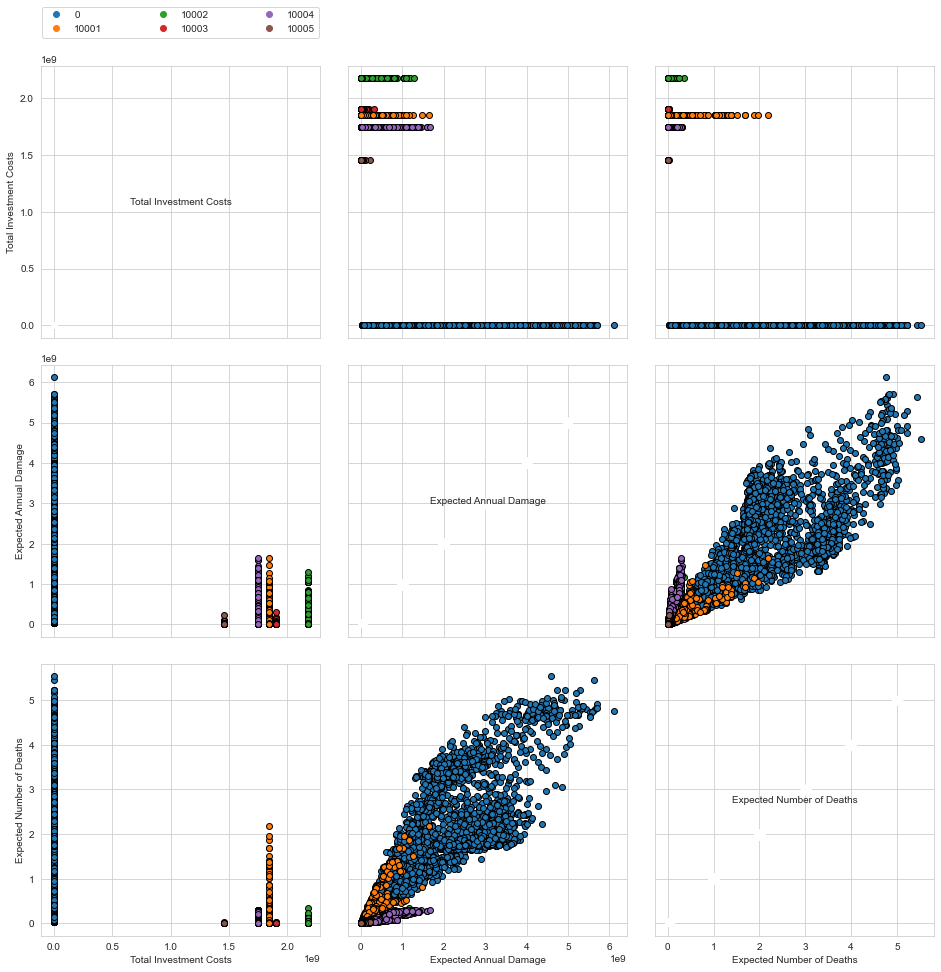

In [2]:
#Load results
results = load_results("./results/5000_scenarios_null_randompolicy.tar.gz")

#Draw a figure of the policies
experiments, outcomes = results
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy', palette = 'colorblind', legend=True)
fig.set_size_inches(16, 16)

plt.savefig("./Figures/NoActionAndRandom.pdf", bbox_inches='tight')

plt.show()

[MainProcess/INFO] results loaded successfully from C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_randompolicy5.tar.gz
[MainProcess/INFO] no time dimension found in results


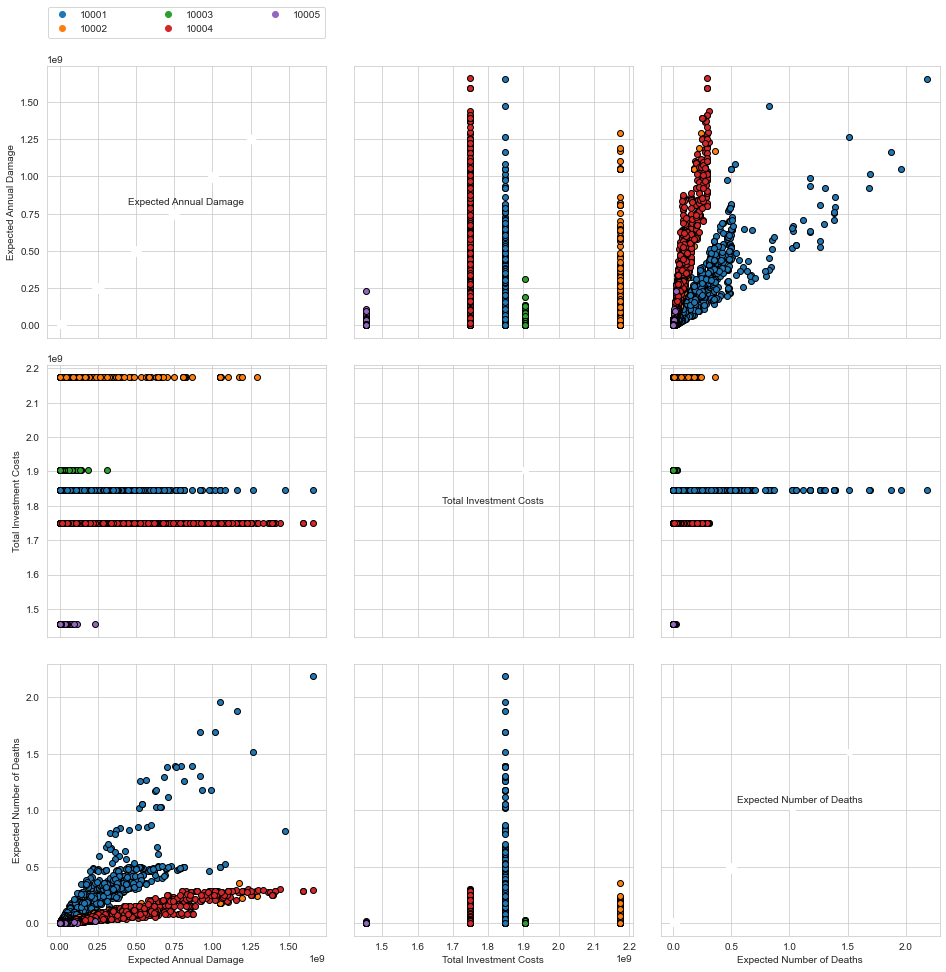

In [3]:
#Load the results of interest
results = load_results("./results/5000_scenarios_randompolicy5.tar.gz")

#Draw a figure of the different policies
experiments, outcomes = results
fig, axes = pairs_plotting.pairs_scatter(
    experiments, outcomes, group_by='policy', palette = 'colorblind', legend=True
)
fig.set_size_inches(16, 16)
plt.savefig("./Figures/5Randompolicies_PF1.pdf", bbox_inches='tight')
plt.show()

## 2. Selection of a worst case scenario
Since the Delta Commission is tasked with preparing the Netherlands to stand resilient against climate change, a clear scenario of interest is the one where everything goes wrong the most. For future analysis of potential policy options this scenario will prove useful as a potential benchmark to assess these policies by.

In [4]:
#Load the results of interest
results = load_results("./results/5000_scenarios_null_randompolicy.tar.gz")
experiments, outcomes = results

#Move outcomes to a dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

#Get index of worst case scenario
index_worst = outcomes_df.sort_values("Expected Number of Deaths").tail(1).index

#Get worst case scenario outcomes (required for saving)
outcomes_worst_df = outcomes_df.iloc[index_worst]

#Prepare for saving
outcomes_worst = outcomes_worst_df.to_dict('list')

#Show worst case scenario's
outcomes_worst

[MainProcess/INFO] results loaded successfully from C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_null_randompolicy.tar.gz


{'Total Investment Costs': [0.0],
 'Expected Annual Damage': [4590481673.547031],
 'Expected Number of Deaths': [5.528961601100001]}

In [5]:
#Select specifications worst case scenario
experiments_worst = experiments.iloc[index_worst]
results_worst = experiments_worst, outcomes_worst

#Save the results
save_results(results_worst, "./results/worstcase_scenario_pf1_30000_scenario.tar.gz")

[MainProcess/INFO] results saved successfully to C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\worstcase_scenario_pf1_30000_scenario.tar.gz


In [8]:
#Load the results of interest
results = load_results("./results/worstcase_scenario_pf1_30000_scenario.tar.gz")
experiments, outcomes = results

#Display the worst case scenario
worst_scenario = experiments.iloc[:, 0:19]
worst_scenario

[MainProcess/INFO] results loaded successfully from C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\worstcase_scenario_pf1_30000_scenario.tar.gz


A.0_ID flood wave shape   A.1_Bmax  A.1_Brate  A.1_pfail   A.2_Bmax  \
0                     25.0  46.887554       10.0   0.108608  35.797369   

   A.2_Brate  A.2_pfail   A.3_Bmax  A.3_Brate  A.3_pfail   A.4_Bmax  \
0        1.0   0.044144  50.836164        1.0   0.035795  36.279183   

   A.4_Brate  A.4_pfail    A.5_Bmax  A.5_Brate  A.5_pfail  discount rate 0  \
0       10.0   0.353773  175.718951        1.0   0.143831              2.5   

   discount rate 1  discount rate 2  
0              4.5              3.5

## Policy exploration
To investigate the impact of potential policies, 4 additional policies of interest were formulated:
1. RfR-Only: At the start only RfR was implemented, no dyke heightening.
2. Dykes-Only: At the start only dyke heightening was implemented, no RfR.
3. Combination: Both dyke heightening and RfR were implementened at the start.
4. Combination-adaptive: Both dyke heightening and RfR were implementened at the start.

Two important additional decisions were made. For each scenario aside from the null-scenario, an EWS was implemented for 3 days. As the DC is unlikely to recommend a plan where people will not be evacuated. Second, to properly compare the two combination options, both only had dyke-heightening of 9dm, only for the adaptive (or more accurately: gradual) combination policy package, this was spread out over the 3 time points.

In [3]:
#Select the preferred problem formulation (0-5)

#dike_model, planning_steps = get_model_for_problem_formulation(0) #2-objective: All Costs & Expected Number of Deaths (END)
#dike_model, planning_steps = get_model_for_problem_formulation(1) #3-objective: Expected Annual Damages (EAD), Total Investment Costs (TIC) & END
#dike_model, planning_steps = get_model_for_problem_formulation(2) #5-objective: EAD, Dike Investment Costs (DIC), RfR Total Costs (RTC), Evacuation Costs (EC) & END
dike_model, planning_steps = get_model_for_problem_formulation(3) #Disagg location: Per Dike: EAD, DIC, Total Costs (TC) & END. Total: RTC & Expected Evacuation Costs (EEC)
#dike_model, planning_steps = get_model_for_problem_formulation(4) #Disagg over time: Per Dike: EAD, DIC & END. Total: RTC & EEC
#dike_model, planning_steps = get_model_for_problem_formulation(5) #Fully disagg: Per Dyke: EAD, DIC & END. Total: RTC & EEC

#Set the levers, uncertainties & outcomes
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)
outcomes = copy.deepcopy(dike_model.outcomes)

In [4]:
# Exploration of alternative policy ideas:
policy_rfr = Policy("RfR-Only",  
                    **{'0_RfR 0': 1, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 1, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 1, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 1, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 1, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 0, 'A.1_DikeIncrease 1' : 0, 'A.1_DikeIncrease 2' : 0,
                    'A.2_DikeIncrease 0' : 0, 'A.2_DikeIncrease 1' : 0, 'A.2_DikeIncrease 2' : 0,
                    'A.3_DikeIncrease 0' : 0, 'A.3_DikeIncrease 1' : 0, 'A.3_DikeIncrease 2' : 0,
                    'A.4_DikeIncrease 0' : 0, 'A.4_DikeIncrease 1' : 0, 'A.4_DikeIncrease 2' : 0,
                    'A.5_DikeIncrease 0' : 0, 'A.5_DikeIncrease 1' : 0, 'A.5_DikeIncrease 2' : 0,
                    'EWS_DaysToThreat':  3   })

policy_dykes = Policy("Dykes-Only",  
                    **{'0_RfR 0': 0, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 0, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 0, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 0, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 0, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 10, 'A.1_DikeIncrease 1' : 0, 'A.1_DikeIncrease 2' : 0,
                    'A.2_DikeIncrease 0' : 10, 'A.2_DikeIncrease 1' : 0, 'A.2_DikeIncrease 2' : 0,
                    'A.3_DikeIncrease 0' : 10, 'A.3_DikeIncrease 1' : 0, 'A.3_DikeIncrease 2' : 0,
                    'A.4_DikeIncrease 0' : 10, 'A.4_DikeIncrease 1' : 0, 'A.4_DikeIncrease 2' : 0,
                    'A.5_DikeIncrease 0' : 10, 'A.5_DikeIncrease 1' : 0, 'A.5_DikeIncrease 2' : 0,
                    'EWS_DaysToThreat':  3   })

policy_combination = Policy("Combination",  
                    **{'0_RfR 0': 1, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 1, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 1, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 1, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 1, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 10, 'A.1_DikeIncrease 1' : 0, 'A.1_DikeIncrease 2' : 0,
                    'A.2_DikeIncrease 0' : 10, 'A.2_DikeIncrease 1' : 0, 'A.2_DikeIncrease 2' : 0,
                    'A.3_DikeIncrease 0' : 10, 'A.3_DikeIncrease 1' : 0, 'A.3_DikeIncrease 2' : 0,
                    'A.4_DikeIncrease 0' : 10, 'A.4_DikeIncrease 1' : 0, 'A.4_DikeIncrease 2' : 0,
                    'A.5_DikeIncrease 0' : 10, 'A.5_DikeIncrease 1' : 0, 'A.5_DikeIncrease 2' : 0,
                    'EWS_DaysToThreat':  3   })

policy_adaptive = Policy("Combination-Adaptive",  
                    **{'0_RfR 0': 1, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 1, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 1, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 1, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 1, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 3, 'A.1_DikeIncrease 1' : 3, 'A.1_DikeIncrease 2' : 3,
                    'A.2_DikeIncrease 0' : 3, 'A.2_DikeIncrease 1' : 3, 'A.2_DikeIncrease 2' : 3,
                    'A.3_DikeIncrease 0' : 3, 'A.3_DikeIncrease 1' : 3, 'A.3_DikeIncrease 2' : 3,
                    'A.4_DikeIncrease 0' : 3, 'A.4_DikeIncrease 1' : 3, 'A.4_DikeIncrease 2' : 3,
                    'A.5_DikeIncrease 0' : 3, 'A.5_DikeIncrease 1' : 3, 'A.5_DikeIncrease 2' : 3,
                    'EWS_DaysToThreat':  3   })


#Set up the no-action scenario
keys = [*[f"{i}_RfR {j}" for i in range(5) for j in range(3)], *[f"A.{i+1}_DikeIncrease {j}" for i in range(5) for j in range(3)]]
values = [0 for i in range(len(keys))]
dictionary =  {k:v for k,v in zip(keys,values)}
dictionary['EWS_DaysToThreat'] = 0

policy_null = Policy(0, **dictionary)

#Final result
policies= [policy_null, policy_rfr, policy_dykes, policy_combination, policy_adaptive]

In [5]:
#Run the model with 5 chosen policies through 5000 scenario's
with MultiprocessingEvaluator(dike_model) as evaluator:
    results_p = evaluator.perform_experiments(5000, policies=policies)

#Save the results
save_results(results_p, "./results/5000_scenarios_chosenpolicy5_PF3.tar.gz")

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 5000 scenarios * 5 policies * 1 model(s) = 25000 experiments
100%|████████████████████████████████████| 25000/25000 [45:07<00:00,  9.23it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_chosenpolicy5_PF3.tar.gz


In [10]:
#Load results
results = load_results("./results/5000_scenarios_chosenpolicy5_PF3.tar.gz")

experiments, outcomes = results

#Set up policy column
outcomes_df = pd.DataFrame.from_dict(outcomes)
outcomes_df['policy'] = experiments['policy']
outcomes_df['policy'] = outcomes_df['policy'].astype(str)

#Set up total columns
deaths_columns = [col for col in outcomes_df.columns if 'Deaths' in col]
outcomes_df['Total Number of Expected Deaths'] = outcomes_df[deaths_columns].sum(axis=1)
costs_columns = [col for col in outcomes_df.columns if 'Costs' in col]
outcomes_df['Total Costs'] = outcomes_df[costs_columns].sum(axis=1)

#Rename the policies
outcomes_df.loc[:5000,'policy'] = 'No Action'
outcomes_df.loc[5000:10000,'policy'] = 'RfR-Only'
outcomes_df.loc[10000:15000,'policy'] = 'Dykes-Only'
outcomes_df.loc[15000:20000,'policy'] = 'Combination'
outcomes_df.loc[20000:25000,'policy'] = 'Combination-Adaptive'

costs_columns

[MainProcess/INFO] results loaded successfully from C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_chosenpolicy5_PF3.tar.gz


['A.1 Total Costs',
 'A.2 Total Costs',
 'A.3 Total Costs',
 'A.4 Total Costs',
 'A.5 Total Costs',
 'RfR Total Costs',
 'Expected Evacuation Costs']

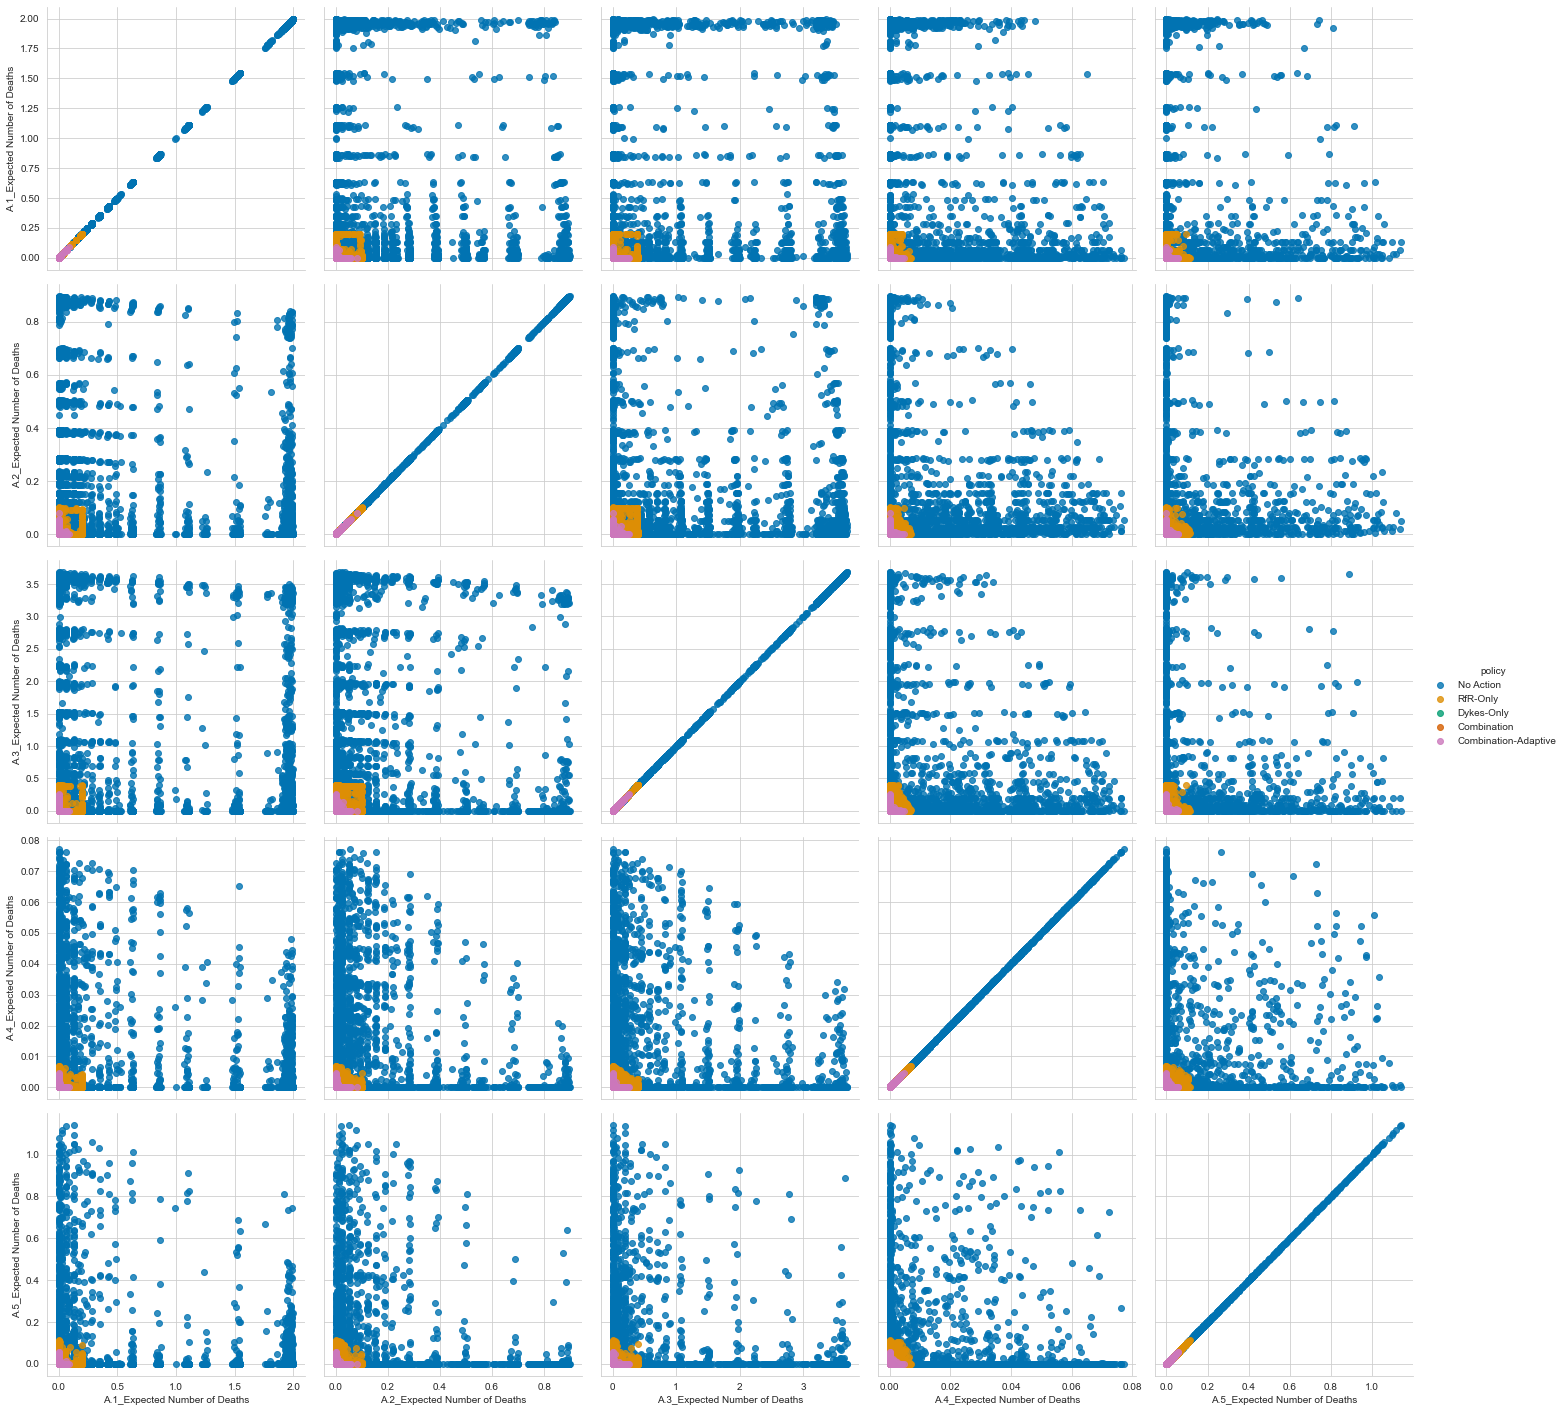

In [14]:
g = sns.PairGrid(outcomes_df, hue = 'policy', palette = 'colorblind', 
                 vars = ['A.1_Expected Number of Deaths','A.2_Expected Number of Deaths','A.3_Expected Number of Deaths','A.4_Expected Number of Deaths','A.5_Expected Number of Deaths'], 
                 height = 4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()
g.savefig("./Figures/END_Random_5ChosenPolicies_PF3.pdf", bbox_inches='tight')

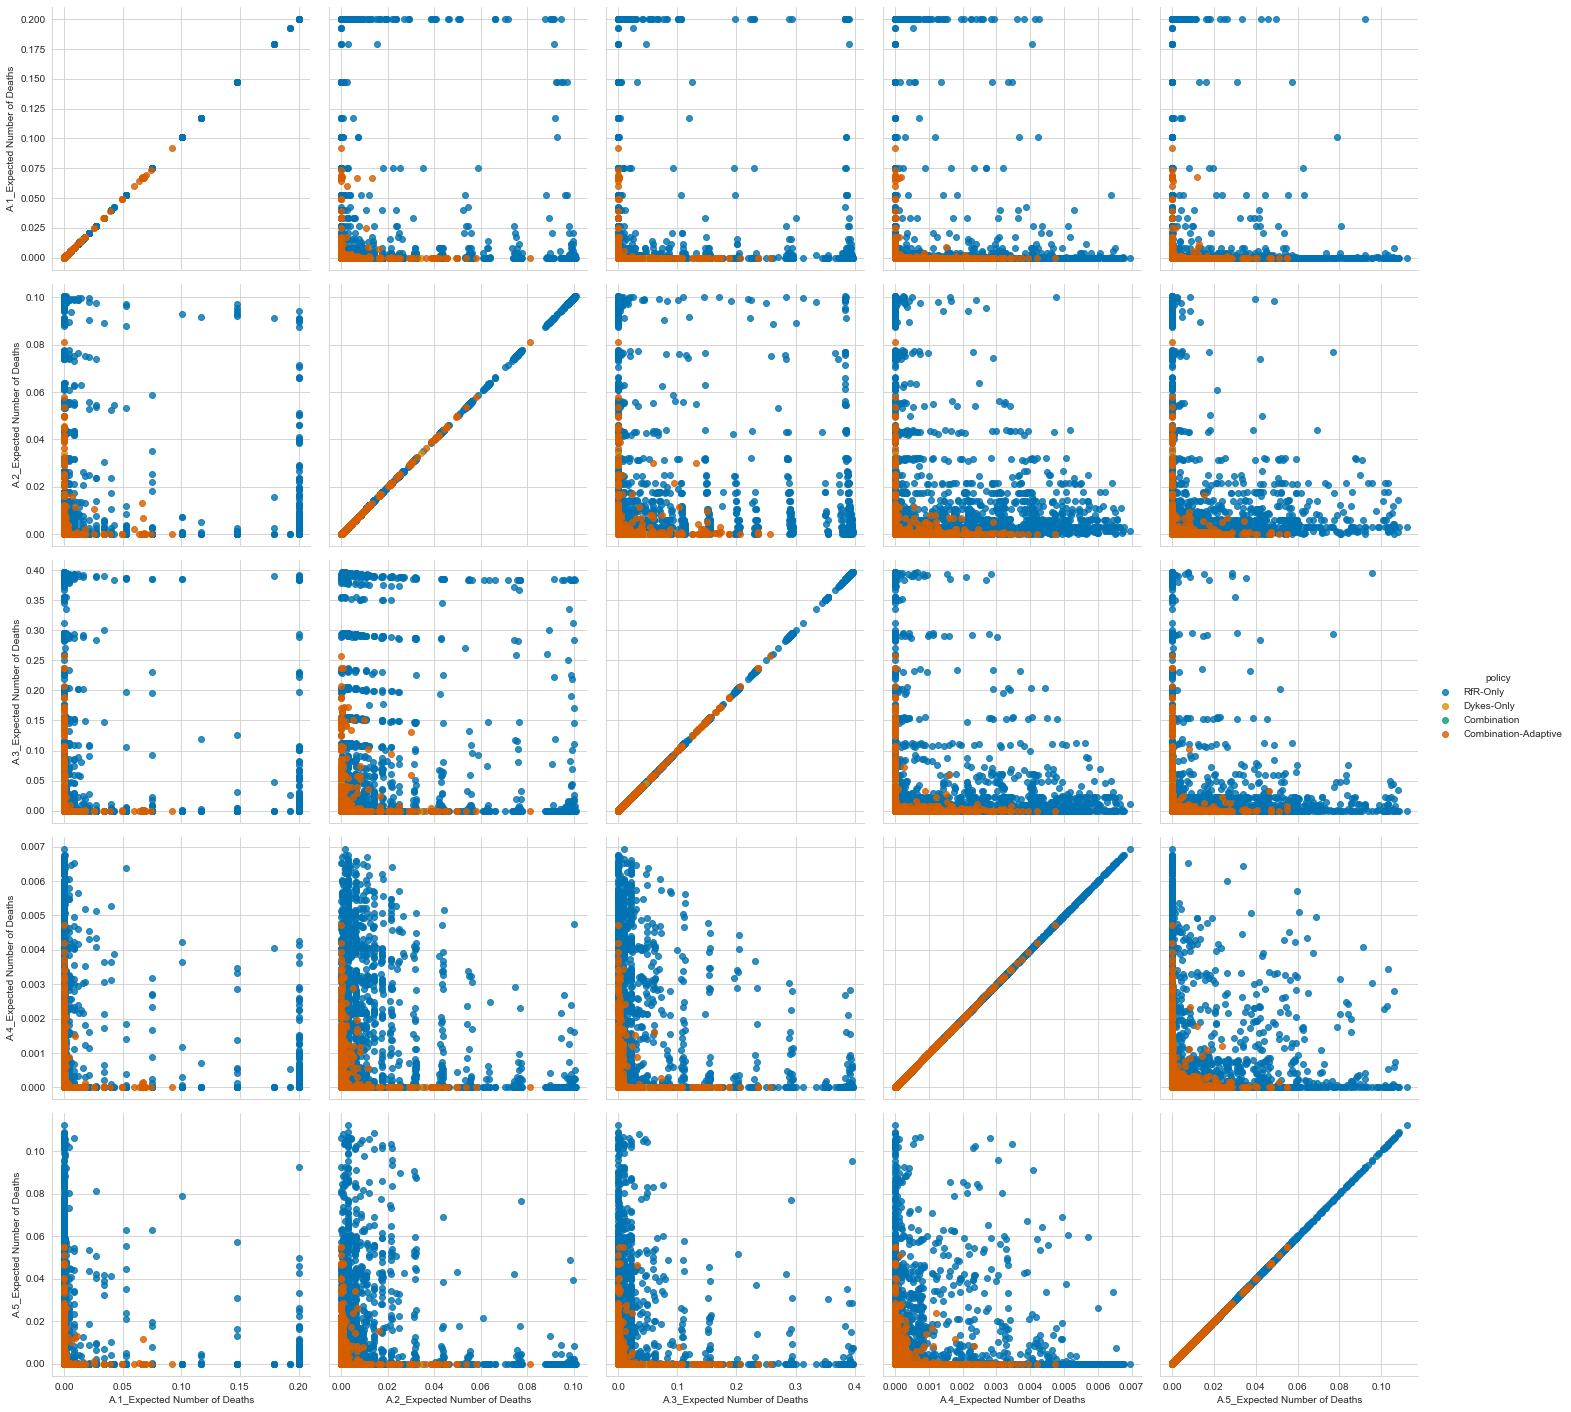

In [15]:
g = sns.PairGrid(outcomes_df[5000:25000], hue = 'policy', palette = 'colorblind', 
                 vars = ['A.1_Expected Number of Deaths','A.2_Expected Number of Deaths','A.3_Expected Number of Deaths','A.4_Expected Number of Deaths','A.5_Expected Number of Deaths'], 
                 height = 4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()
g.savefig("./Figures/END_5ChosenPolicies_PF3.pdf", bbox_inches='tight')

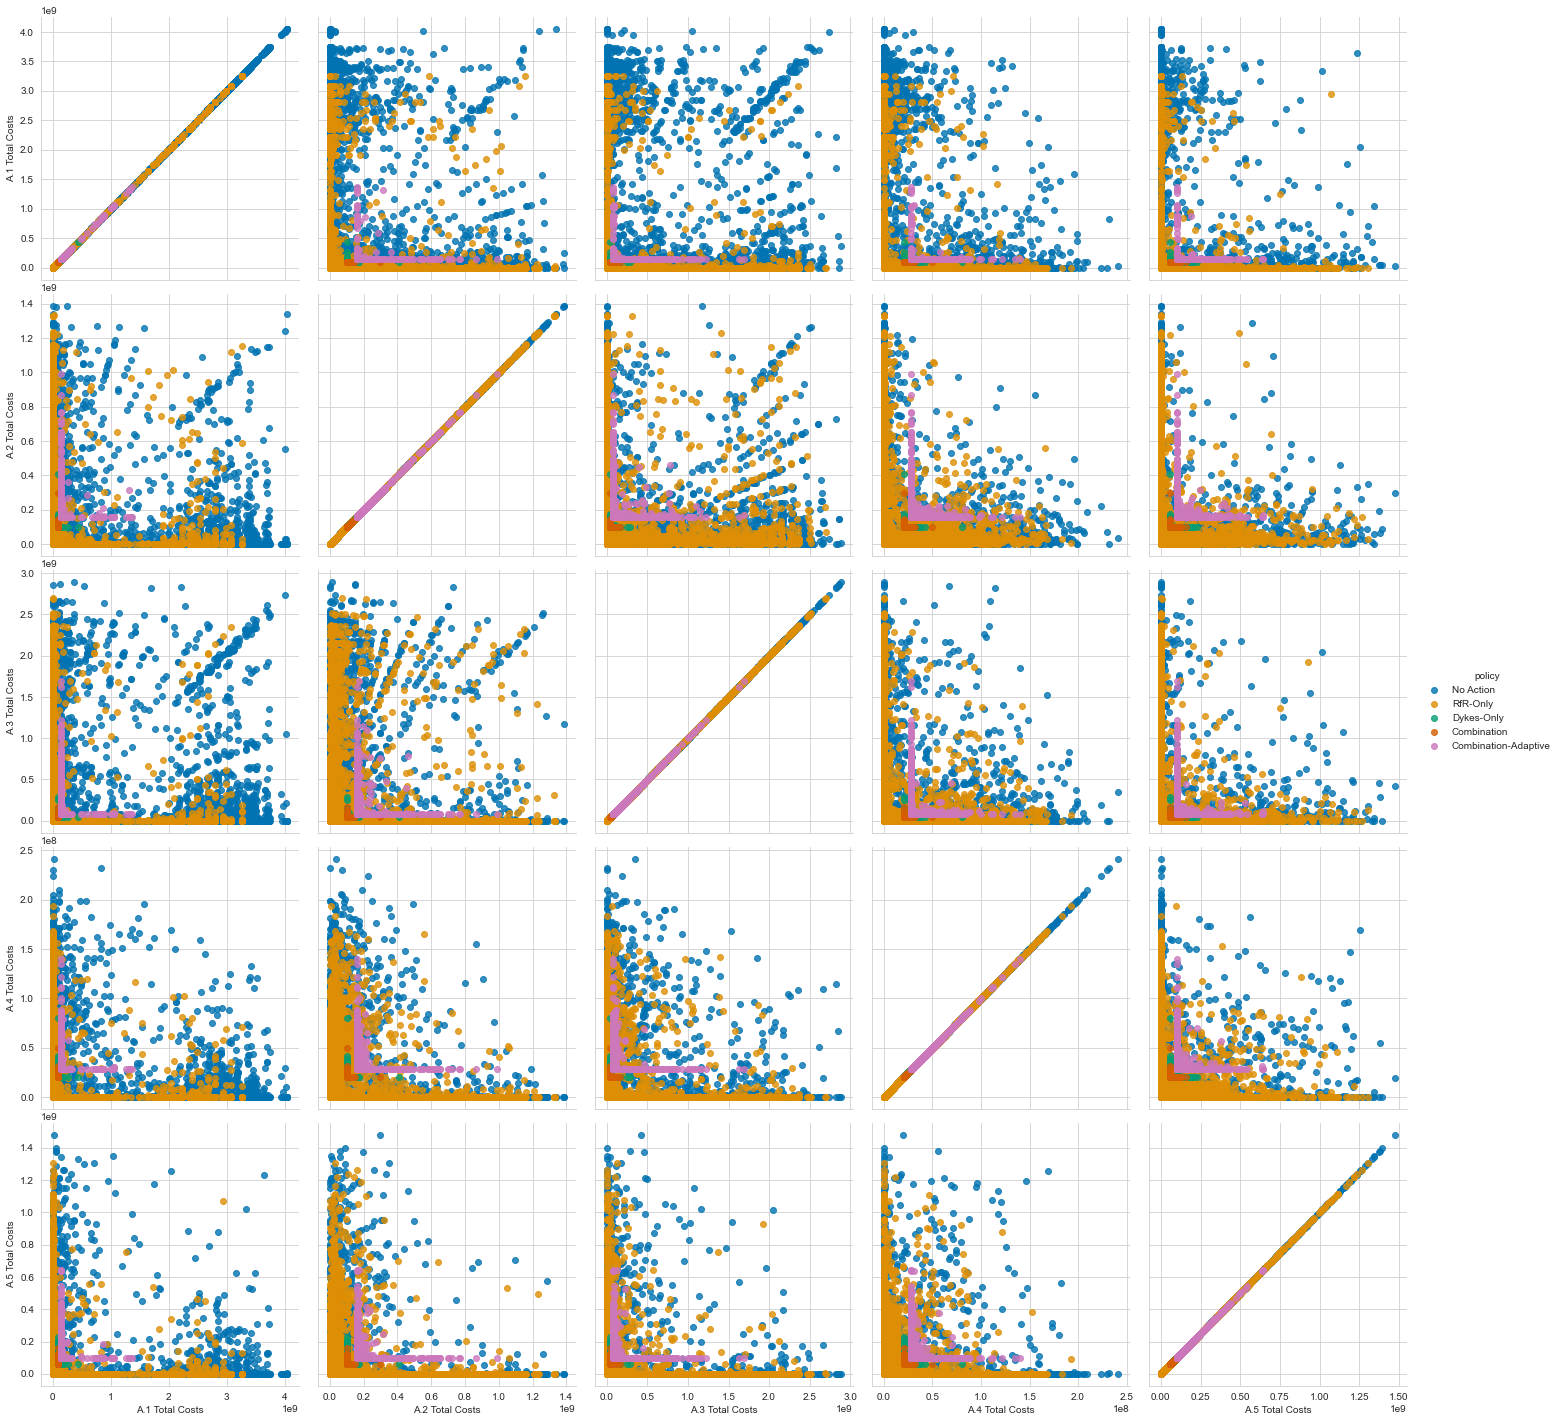

In [16]:
g = sns.PairGrid(outcomes_df, hue = 'policy', palette = 'colorblind', 
                 vars = ['A.1 Total Costs','A.2 Total Costs','A.3 Total Costs','A.4 Total Costs','A.5 Total Costs'], 
                 height = 4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()
g.savefig("./Figures/TC_Random_5ChosenPolicies_PF3.pdf", bbox_inches='tight')

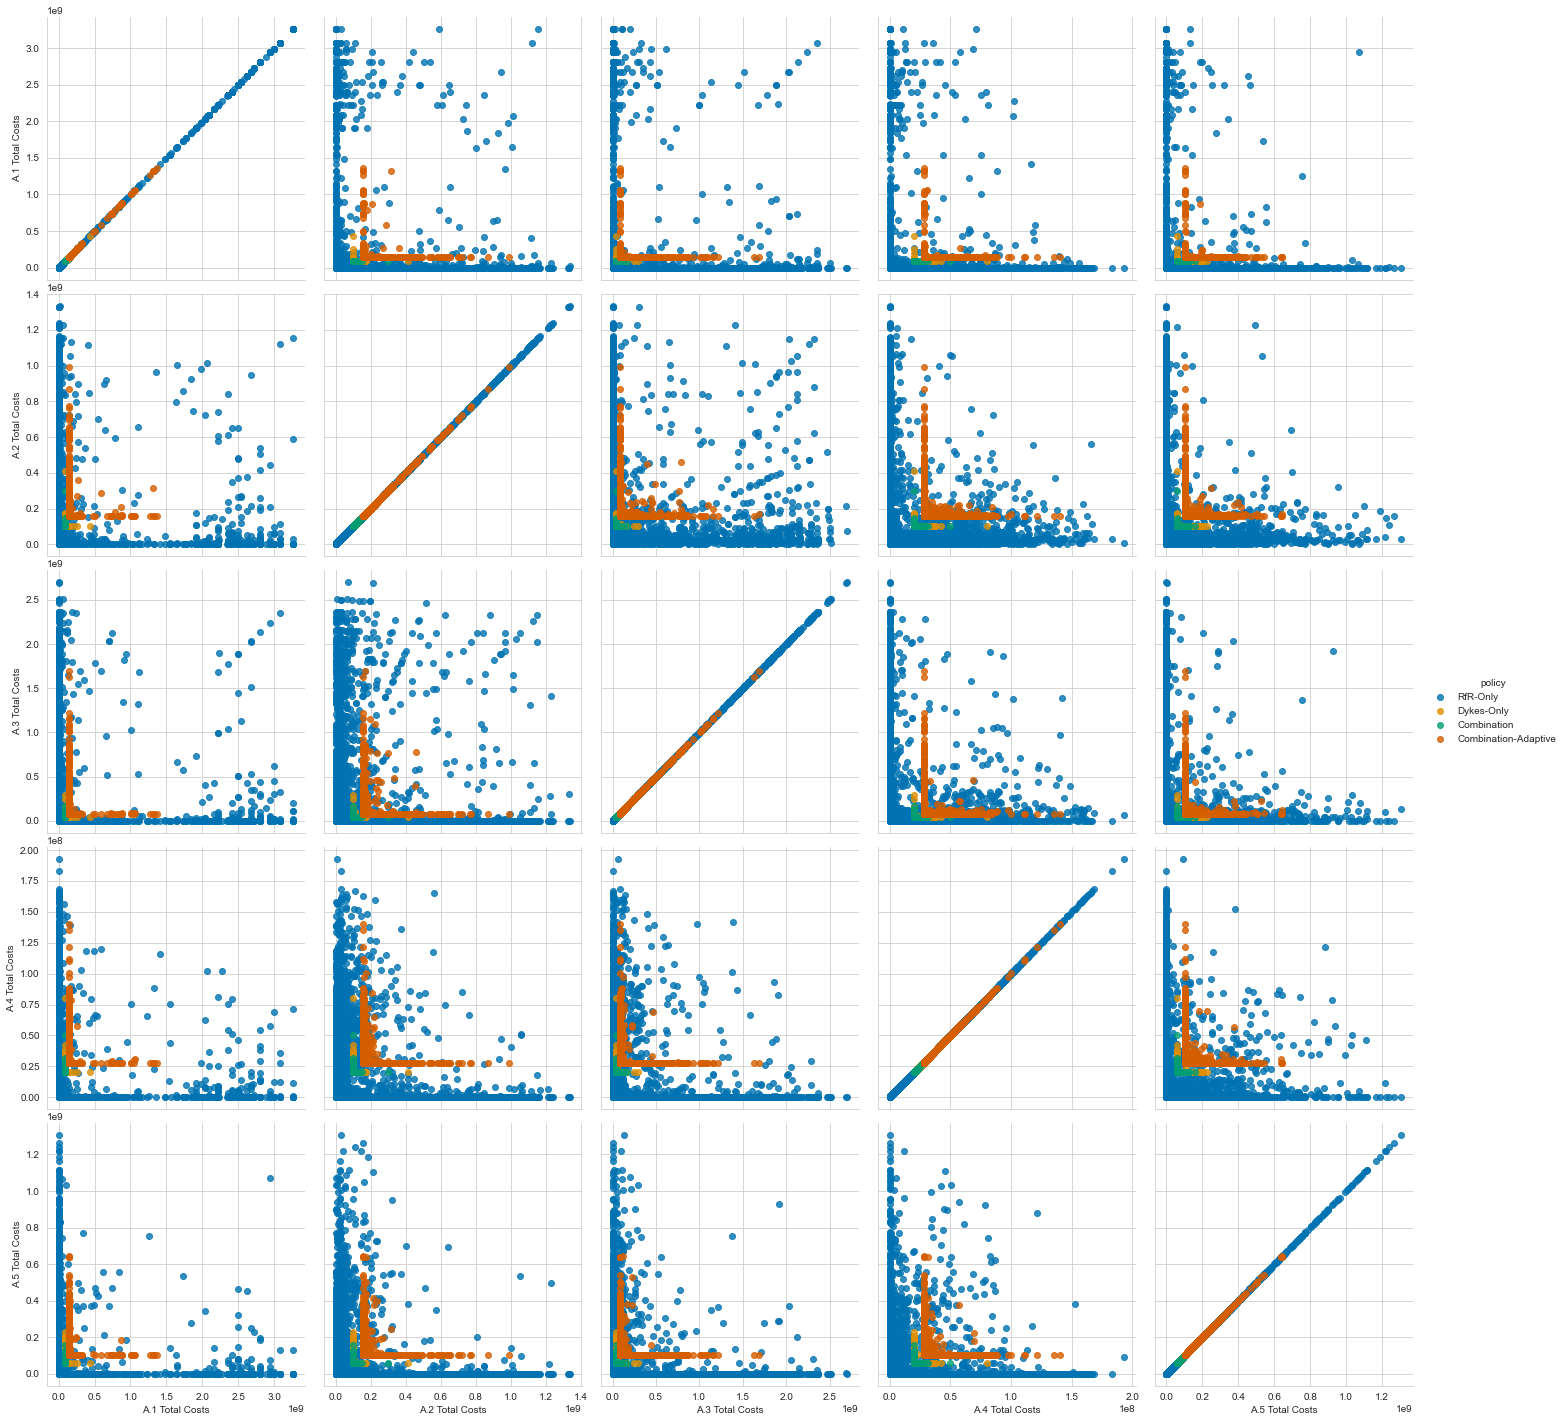

In [17]:
g = sns.PairGrid(outcomes_df[5000:25000], hue = 'policy', palette = 'colorblind', 
                 vars = ['A.1 Total Costs','A.2 Total Costs','A.3 Total Costs','A.4 Total Costs','A.5 Total Costs'], 
                 height = 4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()
g.savefig("./Figures/TC_5ChosenPolicies_PF3.pdf", bbox_inches='tight')

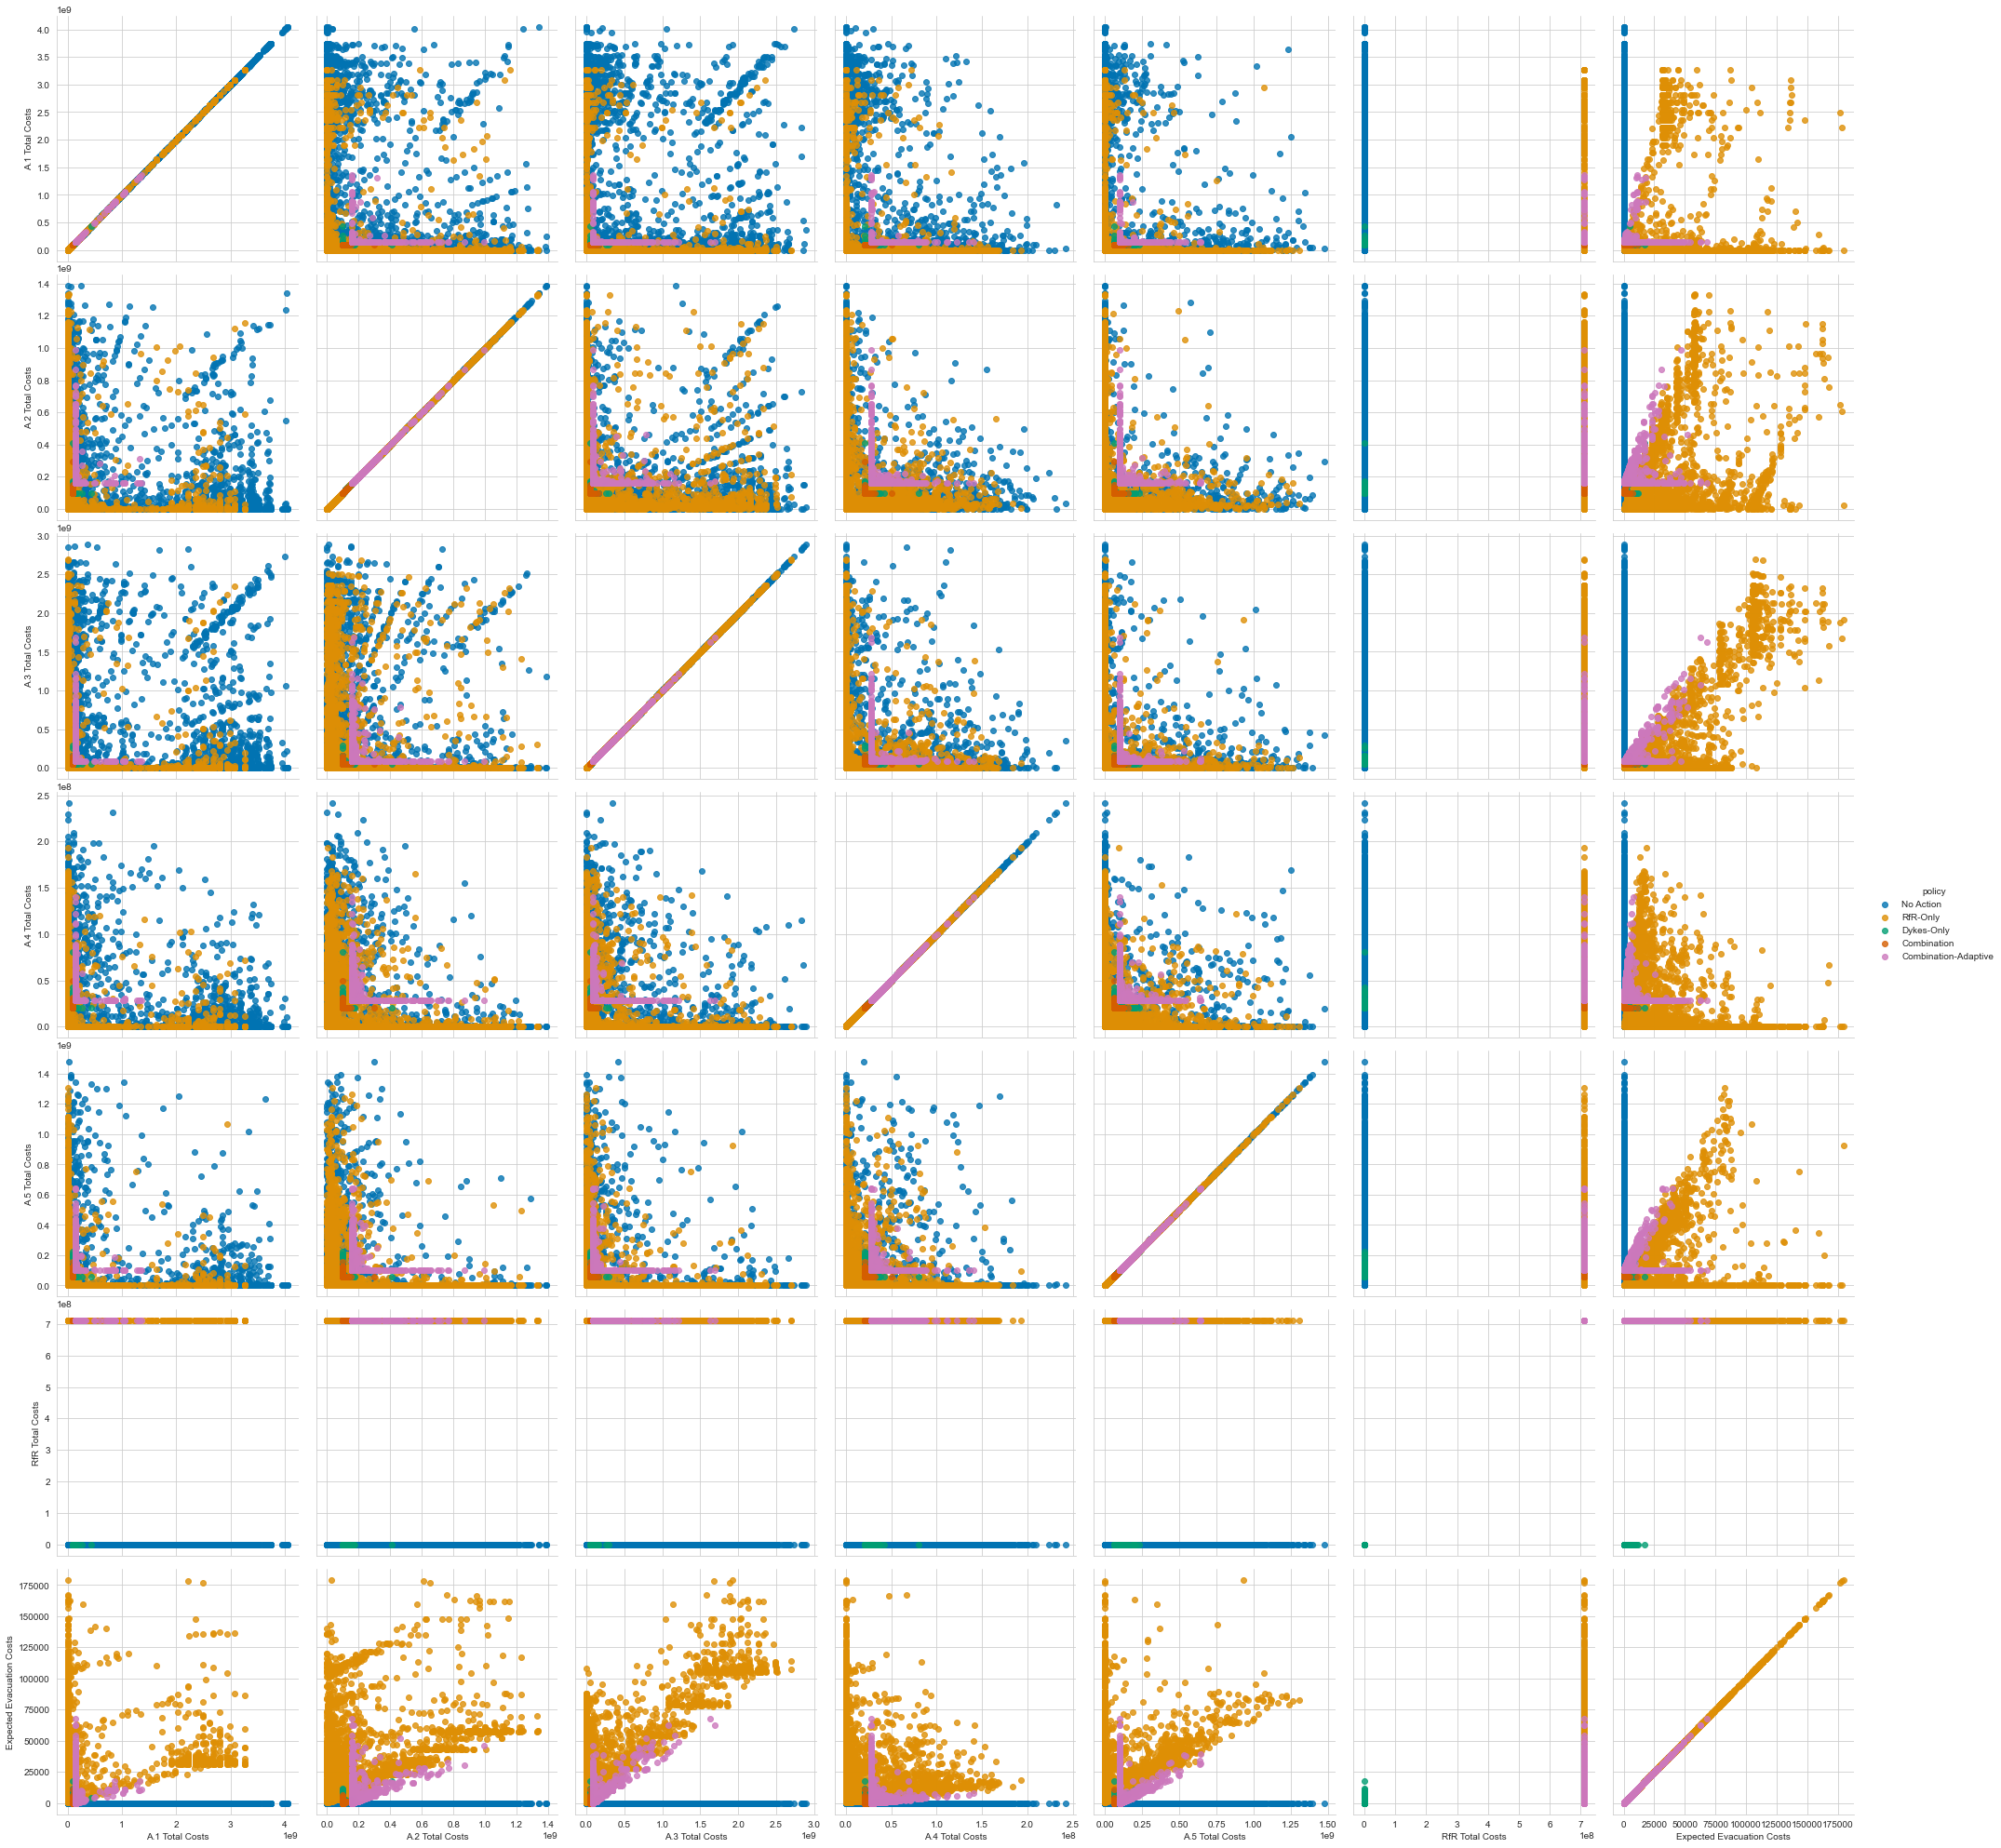

In [18]:
g = sns.PairGrid(outcomes_df, hue = 'policy', palette = 'colorblind', 
                 vars = ['A.1 Total Costs','A.2 Total Costs','A.3 Total Costs','A.4 Total Costs','A.5 Total Costs', 'RfR Total Costs', 'Expected Evacuation Costs'], 
                 height = 4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()
g.savefig("./Figures/AC_Random_5ChosenPolicies_PF3.pdf", bbox_inches='tight')

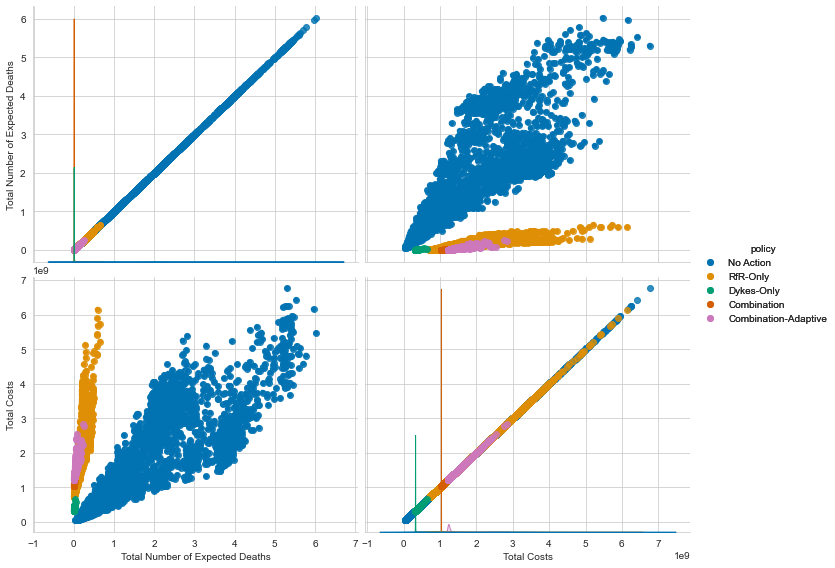

In [20]:
g = sns.pairplot(outcomes_df, hue = 'policy', palette = 'colorblind', 
                 vars = ['Total Number of Expected Deaths','Total Costs'], 
                 height = 4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()
g.savefig("./Figures/END_TC_Agg_Random_5ChosenPolicies_PF3.pdf", bbox_inches='tight')

## Additional visual analysis

In [21]:
#Load results
results = load_results("./results/5000_scenarios_chosenpolicy5_PF3.tar.gz")

experiments, outcomes = results

#Set up policy column
outcomes_df = pd.DataFrame.from_dict(outcomes)
outcomes_df['policy'] = experiments['policy']
outcomes_df['policy'] = outcomes_df['policy'].astype(str)

#Set up total columns
deaths_columns = [col for col in outcomes_df.columns if 'Deaths' in col]
outcomes_df['Total Number of Expected Deaths'] = outcomes_df[deaths_columns].sum(axis=1)
costs_columns = [col for col in outcomes_df.columns if 'Costs' in col]
outcomes_df['Total Costs'] = outcomes_df[costs_columns].sum(axis=1)

#Rename the policies
outcomes_df.loc[:5000,'policy'] = 'No Action'
outcomes_df.loc[5000:10000,'policy'] = 'RfR-Only'
outcomes_df.loc[10000:15000,'policy'] = 'Dykes-Only'
outcomes_df.loc[15000:20000,'policy'] = 'Combination'
outcomes_df.loc[20000:25000,'policy'] = 'Combination-Adaptive'

#Create averages
policy_averages = outcomes_df.groupby(['policy']).mean()

policy_averages

[MainProcess/INFO] results loaded successfully from C:\Users\twand\OneDrive\Documenten\Msc\Q4 2021-2022\epa1361_open-master\final assignment\results\5000_scenarios_chosenpolicy5_PF3.tar.gz


A.1 Total Costs  A.1_Expected Number of Deaths  \
policy                                                                 
Combination              9.510733e+07                       0.000000   
Combination-Adaptive     1.467552e+08                       0.000489   
Dykes-Only               9.526998e+07                       0.000015   
No Action                1.156623e+09                       0.786393   
RfR-Only                 1.707115e+08                       0.013462   

                      A.2 Total Costs  A.2_Expected Number of Deaths  \
policy                                                                 
Combination              9.966507e+07                       0.000016   
Combination-Adaptive     1.712056e+08                       0.001306   
Dykes-Only               9.979311e+07                       0.000031   
No Action                1.489261e+08                       0.135074   
RfR-Only                 1.420913e+08                       0.015339   

                      A.3 Total Costs  A.3_Expected Number of Deaths  \
policy                                                                 
Combination              4.435622e+07                       0.000031   
Combination-Adaptive     9.970041e+07                       0.003896   
Dykes-Only               4.490084e+07                       0.000151   
No Action                4.164356e+08                       0.724556   
RfR-Only                 2.434148e+08                       0.049519   

                      A.4 Total Costs  A.4_Expected Number of Deaths  \
policy                                                                 
Combination              2.040610e+07                       0.000001   
Combination-Adaptive     3.003943e+07                       0.000108   
Dykes-Only               2.045210e+07                       0.000005   
No Action                1.826082e+07                       0.008102   
RfR-Only                 1.589424e+07                       0.000825   

                      A.5 Total Costs  A.5_Expected Number of Deaths  \
policy                                                                 
Combination              5.844047e+07                       0.000031   
Combination-Adaptive     1.121522e+08                       0.001248   
Dykes-Only               5.905795e+07                       0.000104   
No Action                6.722115e+07                       0.060238   
RfR-Only                 6.462769e+07                       0.006930   

                      RfR Total Costs  Expected Evacuation Costs  \
policy                                                             
Combination               710400000.0                  32.971889   
Combination-Adaptive      710400000.0                2600.089555   
Dykes-Only                        0.0                 109.298558   
No Action                         0.0                   0.000000   
RfR-Only                  710400000.0               29246.604222   

                      Total Number of Expected Deaths   Total Costs  
policy                                                               
Combination                                  0.000079  1.028375e+09  
Combination-Adaptive                         0.007046  1.270255e+09  
Dykes-Only                                   0.000306  3.194741e+08  
No Action                                    1.714363  1.807467e+09  
RfR-Only                                     0.086076  1.347169e+09

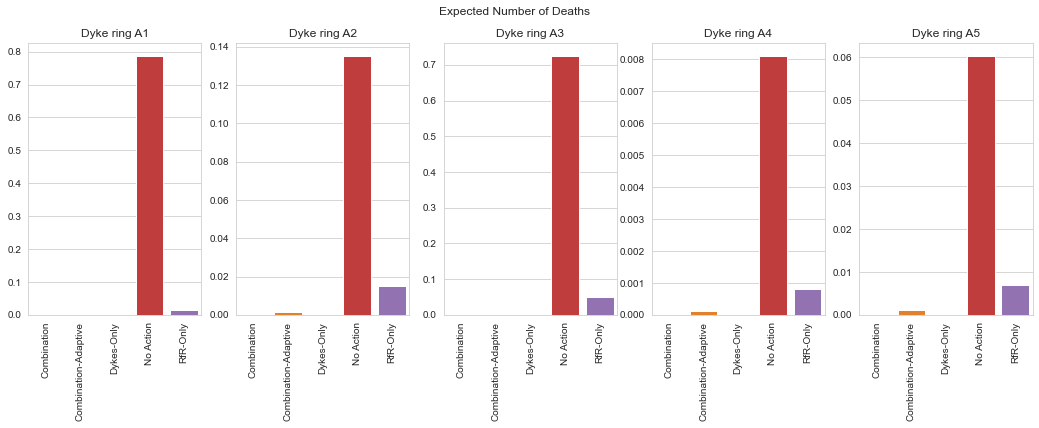

In [23]:
#Create a figure for the 5 dyke rings (END)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_size_inches(18, 5)
fig.suptitle('Expected Number of Deaths')

#subplots
plt.subplot(1, 5, 1)
ax1.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.1_Expected Number of Deaths')
ax1.set(title='Dyke ring A1', xlabel=None, ylabel=None)
ax1.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 2)
ax2.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.2_Expected Number of Deaths')
ax2.set(title='Dyke ring A2', xlabel=None, ylabel=None)
ax2.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 3)
ax3.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.3_Expected Number of Deaths')
ax3.set(title='Dyke ring A3', xlabel=None, ylabel=None)
ax3.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 4)
ax4.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.4_Expected Number of Deaths')
ax4.set(title='Dyke ring A4', xlabel=None, ylabel=None)
ax4.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 5)
ax5.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.5_Expected Number of Deaths')
ax5.set(title='Dyke ring A5', xlabel=None, ylabel=None)
ax5.tick_params(axis='x', rotation=90)

plt.savefig("./Figures/END_Bar_5ChosenPolicies_PF3.pdf", bbox_inches='tight')
plt.show()

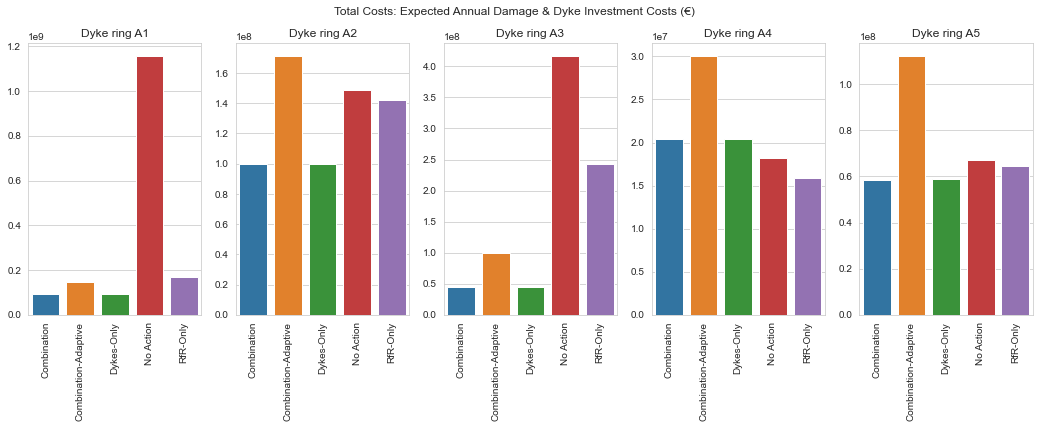

In [24]:
#Create a figure for the 5 dyke rings (TC)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_size_inches(18, 5)
fig.suptitle('Total Costs: Expected Annual Damage & Dyke Investment Costs (€)')

#subplots
plt.subplot(1, 5, 1)
ax1.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.1 Total Costs')
ax1.set(title='Dyke ring A1', xlabel=None, ylabel=None)
ax1.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 2)
ax2.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.2 Total Costs')
ax2.set(title='Dyke ring A2', xlabel=None, ylabel=None)
ax2.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 3)
ax3.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.3 Total Costs')
ax3.set(title='Dyke ring A3', xlabel=None, ylabel=None)
ax3.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 4)
ax4.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.4 Total Costs')
ax4.set(title='Dyke ring A4', xlabel=None, ylabel=None)
ax4.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 5)
ax5.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='A.5 Total Costs')
ax5.set(title='Dyke ring A5', xlabel=None, ylabel=None)
ax5.tick_params(axis='x', rotation=90)

plt.savefig("./Figures/TC_Bar_5ChosenPolicies_PF3.pdf", bbox_inches='tight')
plt.show()

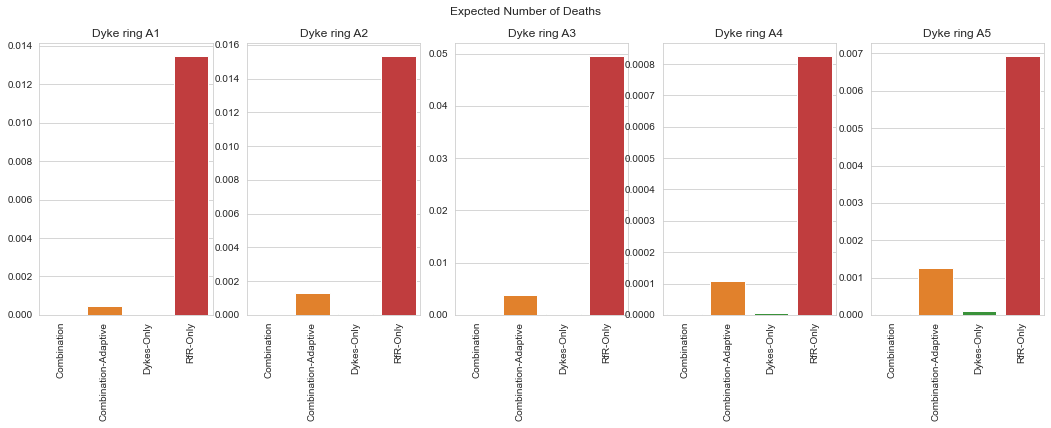

In [25]:
#Remove non-action
policy_averages_non0 = policy_averages.loc[['Combination','Combination-Adaptive','Dykes-Only','RfR-Only'],:]

#Create a figure for the 5 dyke rings (END)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_size_inches(18, 5)
fig.suptitle('Expected Number of Deaths')

#subplots
plt.subplot(1, 5, 1)
ax1.plot = sns.barplot(data=policy_averages_non0, x=policy_averages_non0.index, y='A.1_Expected Number of Deaths')
ax1.set(title='Dyke ring A1', xlabel=None, ylabel=None)
ax1.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 2)
ax2.plot = sns.barplot(data=policy_averages_non0, x=policy_averages_non0.index, y='A.2_Expected Number of Deaths')
ax2.set(title='Dyke ring A2', xlabel=None, ylabel=None)
ax2.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 3)
ax3.plot = sns.barplot(data=policy_averages_non0, x=policy_averages_non0.index, y='A.3_Expected Number of Deaths')
ax3.set(title='Dyke ring A3', xlabel=None, ylabel=None)
ax3.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 4)
ax4.plot = sns.barplot(data=policy_averages_non0, x=policy_averages_non0.index, y='A.4_Expected Number of Deaths')
ax4.set(title='Dyke ring A4', xlabel=None, ylabel=None)
ax4.tick_params(axis='x', rotation=90)
plt.subplot(1, 5, 5)
ax5.plot = sns.barplot(data=policy_averages_non0, x=policy_averages_non0.index, y='A.5_Expected Number of Deaths')
ax5.set(title='Dyke ring A5', xlabel=None, ylabel=None)
ax5.tick_params(axis='x', rotation=90)

plt.savefig("./Figures/END_Bar_4ChosenPolicies_PF3.pdf", bbox_inches='tight')
plt.show()

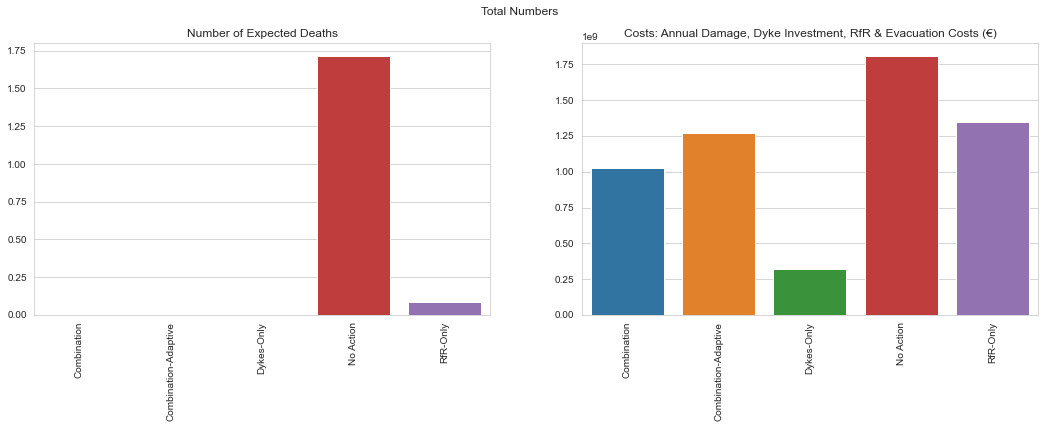

In [27]:
#Create a figure for aggregated data
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 5)
fig.suptitle('Total Numbers')

#subplots
plt.subplot(1, 2, 1)
ax1.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='Total Number of Expected Deaths')
ax1.set(title='Number of Expected Deaths', xlabel=None, ylabel=None)
ax1.tick_params(axis='x', rotation=90)
plt.subplot(1, 2, 2)
ax2.plot = sns.barplot(data=policy_averages, x=policy_averages.index, y='Total Costs')
ax2.set(title='Costs: Annual Damage, Dyke Investment, RfR & Evacuation Costs (€)', xlabel=None, ylabel=None)
ax2.tick_params(axis='x', rotation=90)
plt.savefig("./Figures/TN_Bar_5ChosenPolicies_PF3.pdf", bbox_inches='tight')
plt.show()

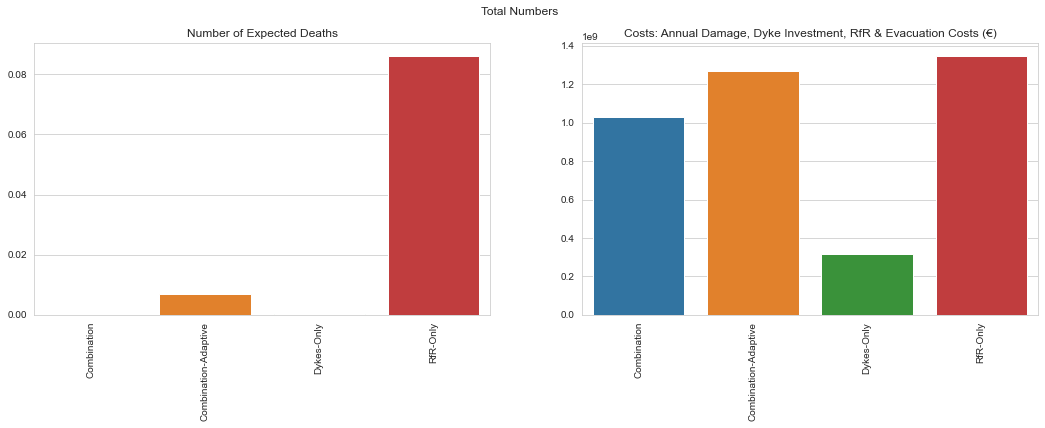

In [28]:
#Create a figure for aggregated data
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 5)
fig.suptitle('Total Numbers')

#subplots
plt.subplot(1, 2, 1)
ax1.plot = sns.barplot(data=policy_averages_non0, x=policy_averages_non0.index, y='Total Number of Expected Deaths')
ax1.set(title='Number of Expected Deaths', xlabel=None, ylabel=None)
ax1.tick_params(axis='x', rotation=90)
plt.subplot(1, 2, 2)
ax2.plot = sns.barplot(data=policy_averages_non0, x=policy_averages_non0.index, y='Total Costs')
ax2.set(title='Costs: Annual Damage, Dyke Investment, RfR & Evacuation Costs (€)', xlabel=None, ylabel=None)
ax2.tick_params(axis='x', rotation=90)

plt.savefig("./Figures/TN_Bar_4ChosenPolicies_PF3.pdf", bbox_inches='tight')
plt.show()

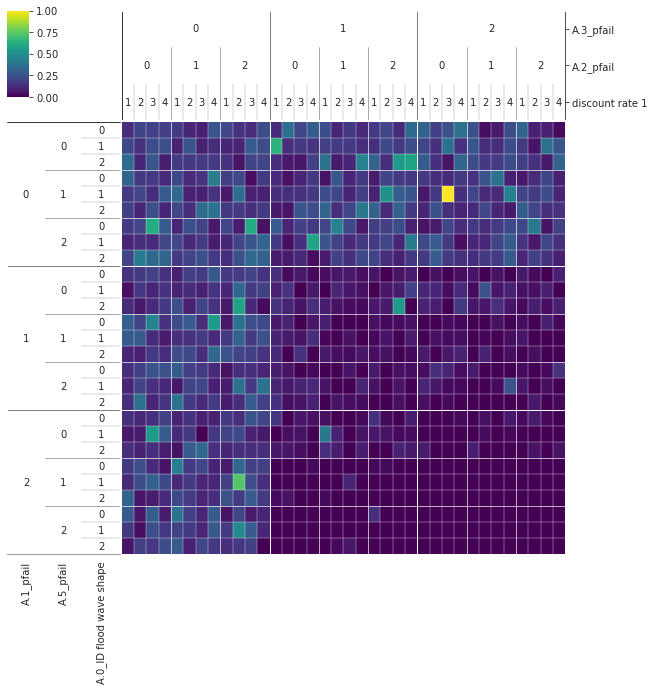

In [193]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x, y, nbins=3)
plt.show()